In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

In [5]:
#only jobs Data Analyst Jobs in the US
df_DA_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#drop NaN values from the 'salary_year_avg' column for more accurate visualisation:
df_DA_us = df_DA_us.dropna(subset=['salary_year_avg'])

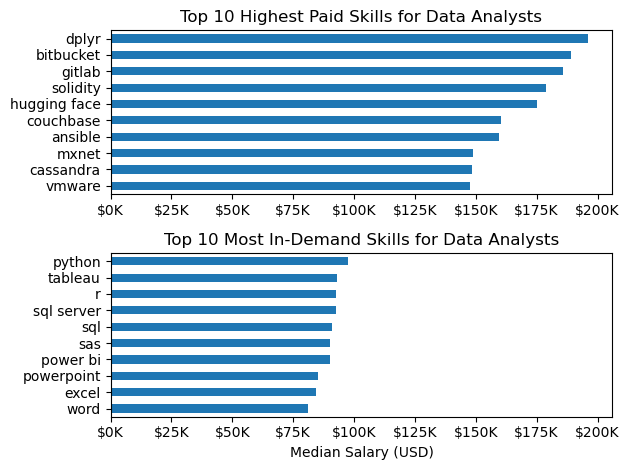

In [6]:
#explode out the job_skills column to enable inspection of skills
df_DA_us = df_DA_us.explode('job_skills')

#groupby to get aggregation with median average.
df_DA_us_grouped = df_DA_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

#Create 2 x DFs. 1 thats shows the job_skill count and salary_year_avg ordered by salary_year_avg. the second ordered by skill count mention:
df_DA_top_pay = df_DA_us_grouped.sort_values(by='median', ascending=False).head(10) #1
df_DA_top_skill_count = df_DA_us_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False) #2 #the second .sort_values sorts the top 10 skills by mention by their pay.

fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis() # or [::-1] after naming the dataframe.
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


df_DA_top_skill_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
#set x lim to 200_000 to match the top graph. 
ax[1].set_xlim(ax[0].get_xlim()) # ax[0].get_xlim() gives me the x lim of ax[0], ie graph 1.
fig.tight_layout() #stops overlap between axis labels and titles

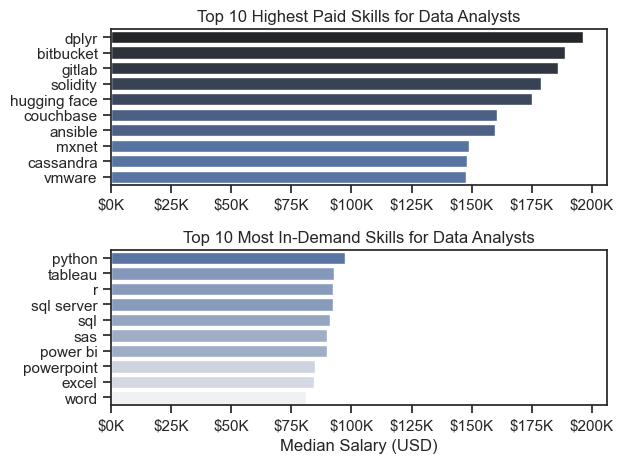

In [22]:
#Same graph but visualised using seaborn librtary:



fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False) #_r reverses coloring
#df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False) # matplotlib method from above

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 Most in-demand Skills for Data Analysts
sns.barplot(data=df_DA_top_skill_count, x='median', y=df_DA_top_skill_count.index, ax=ax[1], hue='median', palette='light:b', legend=False)
#df_DA_top_skill_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False) # matplotlib method from above

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
#set x lim to 200_000 to match the top graph. 
ax[1].set_xlim(ax[0].get_xlim()) # ax[0].get_xlim() gives me the x lim of ax[0], ie graph 1.
fig.tight_layout() #stops overlap between axis labels and titles

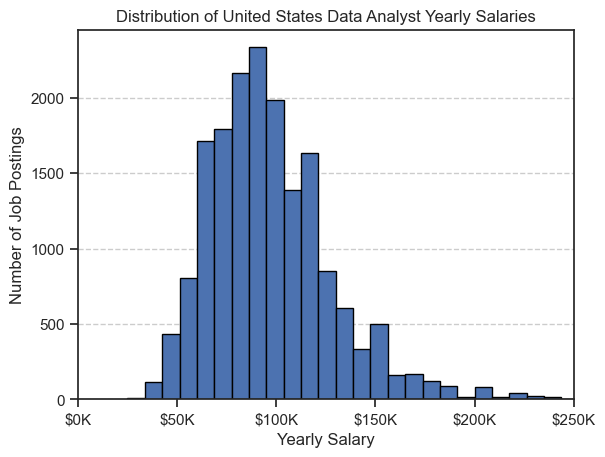

In [23]:
#bins are basically the bars. The more bins (bars) you have, the smaller they are, which gives you a better insight into the data.
#If you have too  many bins (like 100), you starts to  see up & downs within the data set & it's let informative.
df_DA_us['salary_year_avg'].plot(kind='hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250_000) # cut the x lim short because there wasn't much data beyond 250k$
#below is the code from the last lesson to format the x labels like '$250k' etc
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#Add some titles:
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Job Postings')
plt.grid(axis= 'y', linestyle = '--')

Text(12.444444444444445, 0.5, 'Number of Job Postings')

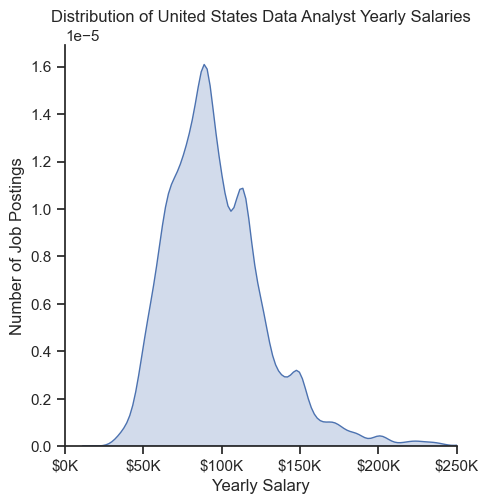

In [28]:

sns.displot(df_DA_us['salary_year_avg'], kind='kde', fill=True)
plt.xlim(0, 250_000) # cut the x lim short because there wasn't much data beyond 250k$
#below is the code from the last lesson to format the x labels like '$250k' etc
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#Add some titles:
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Job Postings')
#plt.grid(axis= 'y', linestyle = '--')

C:\Users\Henry\AppData\Local\Temp\ipykernel_11704\3342554646.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


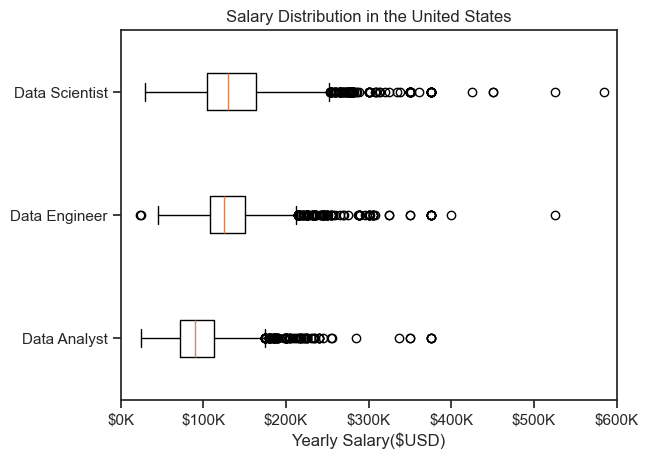

In [29]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist'] #job_title_short's we want to filter for

df_US = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy() # second half is how we filter for the job titles

df_US = df_US.dropna(subset=['salary_year_avg']) # remove NAs from salary_year_avg column

job_list = [df_US[df_US['job_title_short'] == job_title] ['salary_year_avg'] for job_title in job_titles] #create a list of the salaries for the job_title in job_titles

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600_000) # stopped limb at 600k because there was one outlier about 1m$
plt.show()

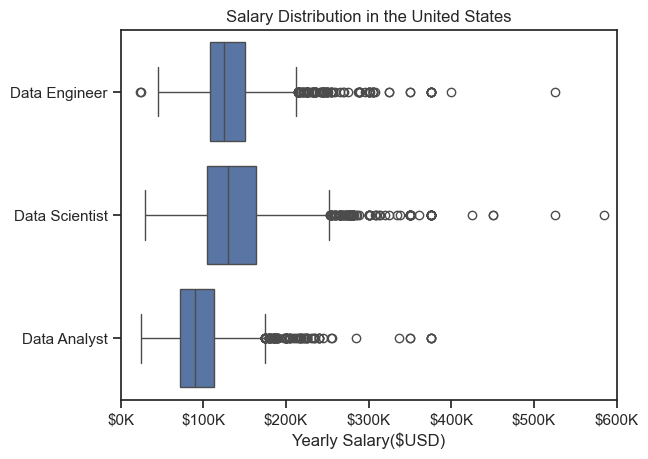

In [32]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600_000) # stopped limb at 600k because there was one outlier about 1m$
plt.show()